## Programming for Data Analysis Project Submission 2018

### Foreword
The investigation and synthesis of data contained in this Jupyter Notebook is the project submission for the 2nd semester 10 credit module - **Programming for Data Analysis**, part of the course entitled *Higher Diploma in Science - Computing(Data Analytics)*, submitted to Dr. Ian McLoughlin, Lecturer and Programme Director at GMIT.

Submitted by Justin Rutherford<br>
December 2018.

### Project Requirements;

*Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*<br>
*1. Investigate the types of variables involved, their likely distributions, and their relationships with each other.*<br>
*2. Synthesise/simulate a data set as closely matching their properties as possible.*<br>
*3. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.*



### Work Plan

1. Decide on the real world phenomenon to be simulated and access a publically available dataset. 
2. Review the dataset and extract the relevant data for further investigation.
3. Establish a baseline set of parameters for which we will then simulate data relecting closely the statistics of the real data.
4. Conduct on-line research to establish the various probability distributions used to simulate similar datasets.
5. Using the relevant Numpy Random distribution function we simulate datasets based on the statistics obtained.

### Summary Results and Commentary



In [1]:
import pandas as pd

# Read in the csv file and select the columns we are interested in;
df = pd.read_csv("http://cli.met.ie/cli/climate_data/webdata/dly375.csv", skiprows=24, low_memory=False, usecols=[0,8,10,14,17,23])

# KEYS - rain - in mm, msl = mean sea level pressure (hPa), wdsp = windspeed (knot), ddhm = Wind direction (degree), soil = soil temperature deg C, glorad = Global radiation (j/cm sq.)

In [2]:
df.tail()

,date,rain,wdsp,ddhm,soil,glorad
5489,26-nov-2018,0.4,4.0,120,4.971,299
5490,27-nov-2018,21.9,12.5,120,7.148,270
5491,28-nov-2018,4.3,17.1,190,9.138,115
5492,29-nov-2018,14.6,8.4,190,7.563,281
5493,30-nov-2018,0.2,8.0,230,5.681,327


In [3]:
df['Datetime']= pd.to_datetime(df['date'])

In [4]:
df.head()

,date,rain,wdsp,ddhm,soil,glorad,Datetime
0,13-aug-2003,,,250,,,2003-08-13
1,14-aug-2003,0.0,4.3,20,,,2003-08-14
2,15-aug-2003,0.0,3.3,0,,,2003-08-15
3,16-aug-2003,0.0,3.4,130,,,2003-08-16
4,17-aug-2003,1.5,6.4,160,,,2003-08-17


In [5]:
#To rearrange the dataframe to have the datetime column first we call it as follows
df = df[['Datetime', 'rain', 'wdsp', 'ddhm', 'soil', 'glorad']]
df.tail()

,Datetime,rain,wdsp,ddhm,soil,glorad
5489,2018-11-26,0.4,4.0,120,4.971,299
5490,2018-11-27,21.9,12.5,120,7.148,270
5491,2018-11-28,4.3,17.1,190,9.138,115
5492,2018-11-29,14.6,8.4,190,7.563,281
5493,2018-11-30,0.2,8.0,230,5.681,327


In [6]:
df = df.set_index('Datetime')
df.tail()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2018-11-26,0.4,4.0,120,4.971,299
2018-11-27,21.9,12.5,120,7.148,270
2018-11-28,4.3,17.1,190,9.138,115
2018-11-29,14.6,8.4,190,7.563,281
2018-11-30,0.2,8.0,230,5.681,327


In [7]:
df1 = df.iloc[4798:5160]
df1.head()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-01-01,1.4,9.5,0,4.453,365
2017-01-02,0.1,4.9,350,1.933,369
2017-01-03,0.0,4.4,270,1.764,124
2017-01-04,0.1,3.8,280,4.232,115
2017-01-05,0.0,5.7,160,4.497,122


In [8]:
df1.tail()


,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-12-27,0.0,8.4,310,2.137,369
2017-12-28,0.0,3.6,280,1.178,243
2017-12-29,13.9,12.0,240,3.191,300
2017-12-30,3.3,13.8,250,5.819,167
2017-12-31,2.1,13.1,220,5.152,164


In [9]:
df1.describe()

,ddhm
count,362.000000
mean,216.602210
std,74.225842
min,0.000000
25%,170.000000
50%,220.000000
75%,270.000000
max,350.000000


In [10]:
#Let's look at the data types we are working with.
df1.dtypes

rain      object
wdsp      object
ddhm       int64
soil      object
glorad    object
dtype: object

In [11]:
df1 = df1.apply(pd.to_numeric, errors = 'coerce')

In [12]:
df1.dtypes

rain      float64
wdsp      float64
ddhm        int64
soil      float64
glorad      int64
dtype: object

In [13]:
df1.head()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-01-01,1.4,9.5,0,4.453,365
2017-01-02,0.1,4.9,350,1.933,369
2017-01-03,0.0,4.4,270,1.764,124
2017-01-04,0.1,3.8,280,4.232,115
2017-01-05,0.0,5.7,160,4.497,122


In [14]:
df1.columns = ['Rainfall','Windspeed','Wind Direction', 'Soil Temp', 'Solar Radiation']

In [15]:
df1['Wind Direction'].head()

Datetime
2017-01-01      0
2017-01-02    350
2017-01-03    270
2017-01-04    280
2017-01-05    160
Name: Wind Direction, dtype: int64

In [16]:
#So now we should have some reference data to use as a guide in generating some random numbers!
Ref_data = df1.describe()
Ref_data

,Rainfall,Windspeed,Wind Direction,Soil Temp,Solar Radiation
count,362.000000,362.000000,362.000000,362.000000,362.000000
mean,2.070994,7.366575,216.602210,11.473392,946.955801
std,4.000466,3.087588,74.225842,5.192958,716.053630
min,0.000000,1.700000,0.000000,0.862000,42.000000
25%,0.000000,5.025000,170.000000,7.372000,322.250000
50%,0.300000,7.150000,220.000000,11.424500,759.500000
75%,2.300000,9.275000,270.000000,16.021500,1498.750000
max,28.200000,20.400000,350.000000,23.930000,3028.000000


In [17]:
# We set up the packages to be used in this investigation.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [18]:
a = df1['Windspeed']
b = df1['Wind Direction']

Text(0.5,0,'Windspeed m/s')

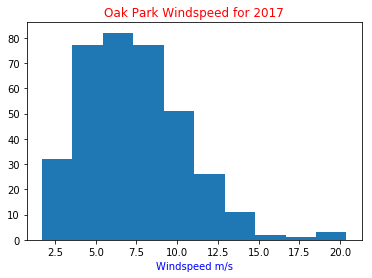

In [19]:
plt.hist(a);
plt.title('Oak Park Windspeed for 2017', color='r')
plt.xlabel('Windspeed m/s',color ='b')

Text(0.5,0,'Wind Direction degrees')

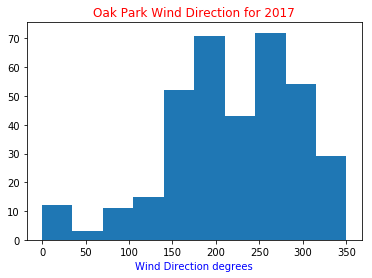

In [20]:
plt.hist(b);
plt.title('Oak Park Wind Direction for 2017', color='r')
plt.xlabel('Wind Direction degrees',color ='b')

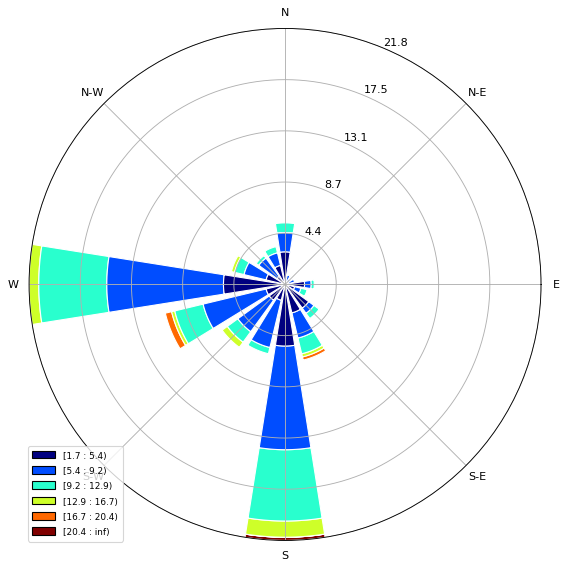

In [21]:
# Adapted from https://media.readthedocs.org/pdf/windrose/latest/windrose.pdf
bins_range = np.arange(1,6,1) # this sets the legend scale
ax = WindroseAxes.from_ax()
ax.bar(b,a, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();

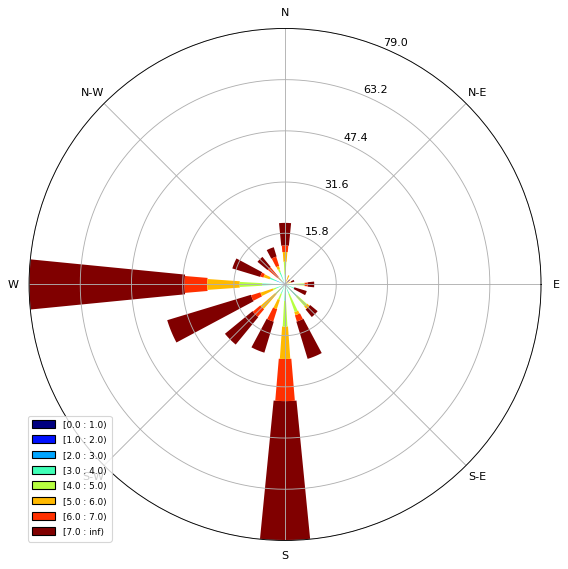

In [22]:
ax = WindroseAxes.from_ax()
ax.box(b, a, bins=np.arange(0, 8, 1))
ax.set_legend()


### Simulated Wind Speed (WdSp) in m/s
Having read the following paper *"Analytical study of different probability distributions for wind speed related to power statistics"*<sup>[Ref](https://ieeexplore.ieee.org/document/5211970)</sup>, we elected to use a weibull distribution function in generating random varialbes for wind speed.

Text(0.5,1,'Simulated Windspeed Data')

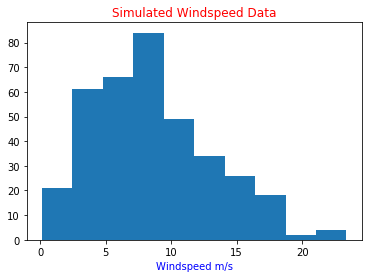

In [23]:
# Fake up some Wind Speed data
wdsp = np.random.weibull(2, 365) *10 # We inlcude a multiplication factor to give the range value we are seeking.
plt.hist(wdsp, bins =10);
plt.xlabel('Windspeed m/s', color='b')
plt.title('Simulated Windspeed Data', color='r')

Text(0.5,1,'Simulated Wind Direction Data')

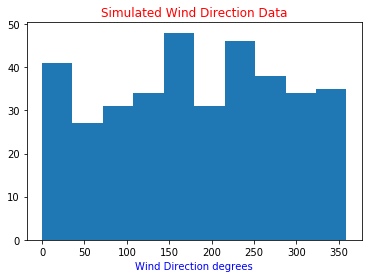

In [24]:
# Simulate Wind Direction
wddir = np.random.randint(0, 360, 365) # We haven't figured out how to stack the data in a particular sector e.g. south/southwest
plt.hist(wddir);
plt.xlabel('Wind Direction degrees', color='b')
plt.title('Simulated Wind Direction Data', color='r')

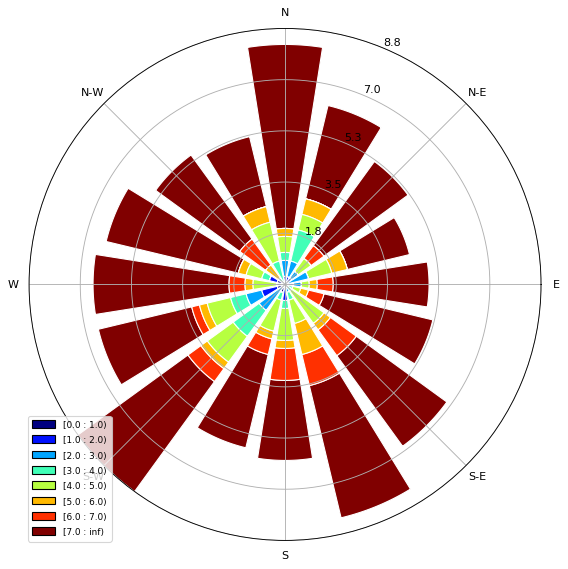

In [25]:
#Now let's plot some nicer graphics using the Windrose function in Matplotlib
# Adapted from https://media.readthedocs.org/pdf/windrose/latest/windrose.pdf
ax = WindroseAxes.from_ax()
ax.bar(wddir,wdsp, normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 8, 1))
ax.set_legend()
plt.show()

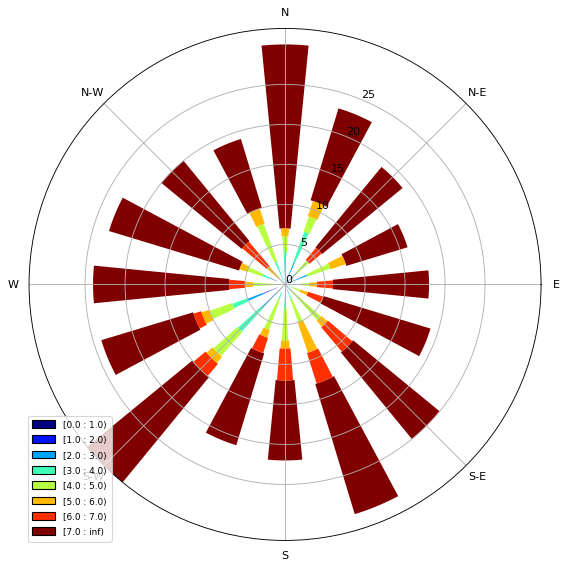

In [26]:
ax = WindroseAxes.from_ax()
ax.box(wddir,wdsp, bins=np.arange(0, 8, 1))
ax.set_legend()
ax.set_yticks(np.arange(0, 30, step=5))
ax.set_yticklabels(np.arange(0, 30, step=5))
plt.show()

### Rainfall
We looked at ......

In [27]:
c = df1['Rainfall']
c.mean()# Verify correct data selected using metric

2.0709944751381237

Text(0.5,0,'Rainfall in mm')

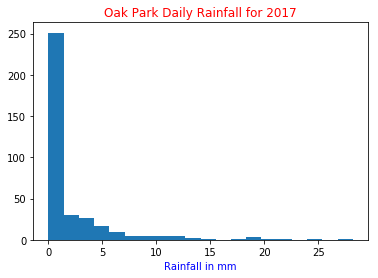

In [28]:
plt.hist(c, bins=20);
plt.title('Oak Park Daily Rainfall for 2017', color='r')
plt.xlabel('Rainfall in mm',color ='b')

In [29]:
# We need to figure out what is the best distribution function for this parameter.

In [30]:
# Assume Rainfall has a normal distribution - we have the values for 'mean' and 'std' from above, so let's plot.
FakeRain = np.random.normal(2.07, 4.0, 365)

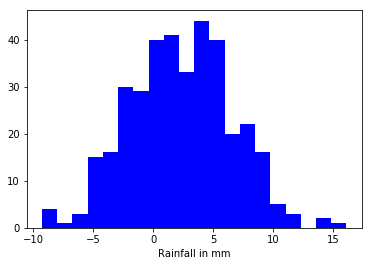

In [31]:
plt.hist(FakeRain,20, color ='b')
plt.xlabel('Rainfall in mm');

In [32]:
#Now let's look at the statistics of the number array (ref = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html)
from scipy import stats
stats.describe(FakeRain)

DescribeResult(nobs=365, minmax=(-9.272406954428476, 16.09400201228035), mean=2.3136689394728824, variance=17.507769016634985, skewness=0.05491138126819916, kurtosis=-0.10613530061423582)

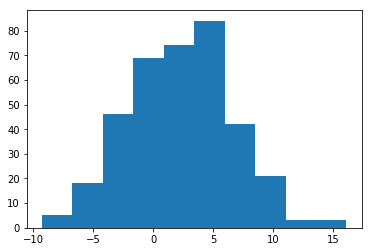

In [33]:
# So, we see that the 'normal' distribution has negative numbers, which is contrary to actual data, so we look at applying a variation of the 'normal' distribution.
# However we see that the rainfall distribution is returning negative numbers - so let's find a different distribution.
#Having read the paper on 'PDF of rainrate and estimation of rainfall' (as referenced in the footer), we will use the lognormal distribution function;

Rain = np.random.lognormal(2.07, 4.0, 365)
plt.hist(FakeRain);

In [34]:
# We see from the graphic that lognormal is not giving us the required result as it is returning exponential result.
#Having read through the various distribution options in the SciPy.org 'Random Sampling (numpy.random)' we note references in the Gumbel distribution to rainfall.
#The Gumbel (named for German mathematician Emil Julius Gumbel) was used very early in the hydrology literature, for modeling the occurrence of flood events. It is also used for modeling maximum wind speed and rainfall rates. It is a “fat-tailed” distribution - the probability of an event in the tail of the distribution is larger than if one used a Gaussian, hence the surprisingly frequent occurrence of 100-year floods.

#First however we need to determine the location of the 'mode' value for the Gumbel distribution.
#We do this by applying the function 
df1.iloc[:,0].mode()

0    0.0
dtype: float64

In [35]:
#We know the location fo the mode and the shape, and the days per year
FakeRain1 = np.random.gumbel(0.0,2,365)

Text(0.5,1,'Histogram of Rainfall for 2017')

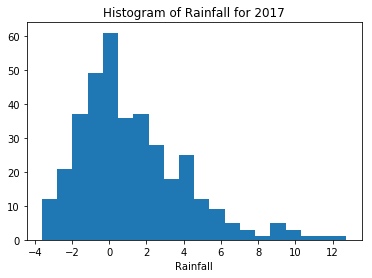

In [36]:
# Let's increase the number of bins to give us a more accurate reflection of the sampling fequency;
plt.hist(FakeRain1, 20)
plt.xlabel('Rainfall')
plt.title('Histogram of Rainfall for 2017')

In [37]:
from scipy import stats
stats.describe(FakeRain1)

DescribeResult(nobs=365, minmax=(-3.610496361722571, 12.745584800764773), mean=1.1869736496486851, variance=8.062838929411308, skewness=1.0639798731542942, kurtosis=1.3386163658118155)

In [38]:
# Again we have negative numbers from a distribution from which we require non-negative numbers.
# Let's look at some non-negative type distributions.

In [39]:
FakeRain2 = np.random.wald(2.07,28.2,365) 
stats.describe(FakeRain2)

DescribeResult(nobs=365, minmax=(0.9848751279516019, 5.016417341274528), mean=2.0882482812620826, variance=0.3334026713416167, skewness=1.0749707537918163, kurtosis=2.3400340726153797)

In [40]:
# We now see that the 'Wald' distribution function gives us non-negative numbers with a correct 'mean' but the min/max values are incorrect.


### Soil Temperature in deg Celsius

In [41]:
#Let's establish was the baseline look like;
d = df1['Soil Temp']

In [42]:
d.mean() #quick check to see if the data selection is correct

11.473392265193366

Text(0.5,1,'Oakpark Soil Temperature for 2017')

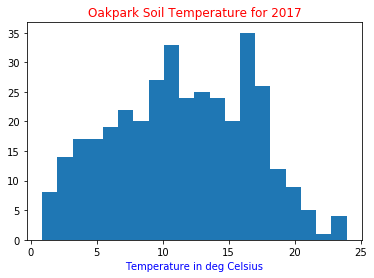

In [43]:
plt.hist(d, bins=20);
plt.xlabel('Temperature in deg Celsius', color='b')
plt.title('Oakpark Soil Temperature for 2017', color='r')

In [44]:
#Having read the paper on "Matching Temperature Data to a Normal Distribution" we will now deploy a random normal distribution
#generate comparable data to the target dataset.

In [45]:
Fake_Temp = np.random.normal(11.47, 5.19, 362)

In [46]:
Fake_Temp.max()

29.75402196855412

In [47]:
Fake_Temp.min()

-5.193336382410168

In [48]:
Fake_Temp.mean()

11.481939193801546

Text(0.5,1,'Simulated Soil Temperature')

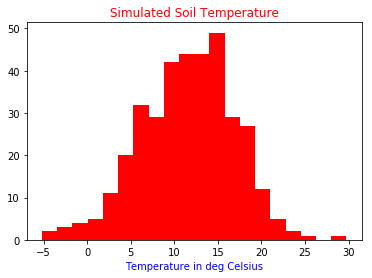

In [50]:
count, bins, ignored = plt.hist(Fake_Temp,20, color='r')
plt.xlabel('Temperature in deg Celsius', color='b')
plt.title('Simulated Soil Temperature', color='r')

In [51]:
stats.describe(Fake_Temp)

DescribeResult(nobs=362, minmax=(-5.193336382410168, 29.75402196855412), mean=11.481939193801546, variance=29.25170856252463, skewness=-0.20760471068593125, kurtosis=0.11838748268749733)

### Solar Radiation

In [52]:
e = df1['Solar Radiation']

In [53]:
e.mean() #just checking!

946.9558011049724

Text(0.5,1,'Oakpark Solar Radiation for 2017')

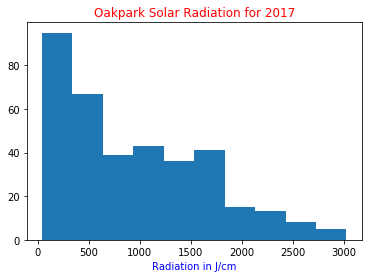

In [57]:
plt.hist(e);
plt.xlabel('Radiation in J/cm', color='b')
plt.title('Oakpark Solar Radiation for 2017', color='r')

[The Probability Density Function of Rain Rate and the Estimation of Rainfall by Area Integrals](https://journals.ametsoc.org/doi/10.1175/1520-0450%281994%29033%3C1255%3ATPDFOR%3E2.0.CO%3B2)

[SIMULATING MAXIMUM AND MINIMUM DAILY TEMPERATURE
WITH THE NORMAL DISTRIBUTION](https://naldc.nal.usda.gov/download/27264/PDF)

[Matching Temperature Data to a Normal Distribution](http://demonstrations.wolfram.com/MatchingTemperatureDataToANormalDistribution/)



[Statistical Properties of the Atmospheric Pressure Field over the Artic Ocean](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281982%29039%3C2229%3ASPOTAP%3E2.0.CO%3B2)

[Probability distributions for offshore wind speeds](https://engineering.tufts.edu/cee/people/vogel/documents/probabilityDistributionsOffshoreWindSpeeds.pdf)

[Analytical study of different probability distributions for wind speed related to power statistics](https://ieeexplore.ieee.org/document/5211970)